In [55]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,recall_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv("C:\\Users\\sanjay\\Documents\\All working files\\data\\machine learning data\\Titanin_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
X = df.drop(columns=['Survived'], axis=1)
y = df['Survived']

In [7]:
X = X.drop(columns=['PassengerId','Name','Ticket'])

In [9]:
X.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [13]:
X = X.drop(columns=['Cabin'])

<Axes: ylabel='Frequency'>

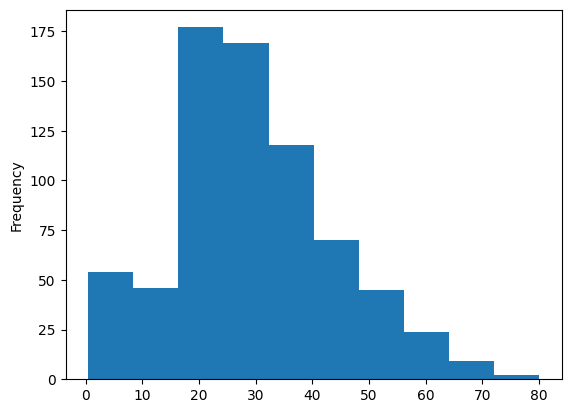

In [16]:
X['Age'].plot(kind='hist')

In [18]:
round(X['Age'].mean(),1)

29.7

In [22]:
X['Age'] = X['Age'].fillna(round(X['Age'].mean(),1))

In [27]:
X['Embarked'] = X['Embarked'].fillna(X['Embarked'].mode()[0])

In [28]:
X.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [37]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [38]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
97,1,male,23.0,0,1,63.3583,C
742,1,female,21.0,2,2,262.3750,C
754,2,female,48.0,1,2,65.0000,S
839,1,male,29.7,0,0,29.7000,C
184,3,female,4.0,0,2,22.0250,S
...,...,...,...,...,...,...,...
400,3,male,39.0,0,0,7.9250,S
118,1,male,24.0,0,1,247.5208,C
701,1,male,35.0,0,0,26.2875,S
206,3,male,32.0,1,0,15.8500,S


In [42]:
X.columns[6]

'Embarked'

In [47]:
step1 = ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(sparse_output=False,drop='first'),[1,6])
],remainder='passthrough')

step2 = LogisticRegression(max_iter=200)

pipe = Pipeline([('step1',step1),
                 ('step2',step2)])



In [50]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [1, 6])])),
                ('step2', LogisticRegression(max_iter=200))])

In [53]:
y_pred = pipe.predict(X_test)
accuracy_score(y_test,y_pred)

0.8295964125560538

In [54]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,29.7,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [62]:
step1 = ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(sparse_output=False,drop='first'),[1,6]),
    ('tnf2',StandardScaler(),[2,5])
],remainder='passthrough')

step2 = LogisticRegression(max_iter=200)

pipe = Pipeline([('step1',step1),
                 ('step2',step2)])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
accuracy_score(y_test,y_pred)

0.8295964125560538